In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("/content/spam_emails.csv")

In [4]:
print("🔹 Dataset Info:")
print(df.info())
print("\n🔹 First 5 Rows:")
print(df.head())

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_links          100 non-null    int64  
 1   num_attachments    100 non-null    int64  
 2   sender_reputation  100 non-null    float64
 3   is_spam            100 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None

🔹 First 5 Rows:
   num_links  num_attachments  sender_reputation is_spam
0          1                2           0.188025      no
1          4                1           0.355385      no
2          3                4           0.783792      no
3          2                4           0.554227      no
4          6                1           0.005230      no


In [5]:
print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Missing Values:
num_links            0
num_attachments      0
sender_reputation    0
is_spam              0
dtype: int64


In [6]:
df['is_spam'] = df['is_spam'].map({'yes': 1, 'no': 0})

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


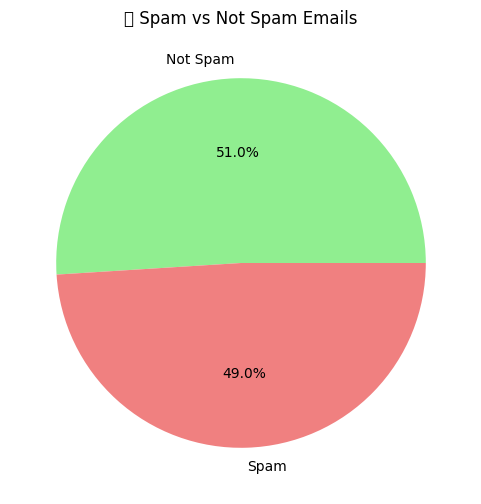

In [7]:
spam_counts = df['is_spam'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(spam_counts, labels=['Not Spam', 'Spam'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('📧 Spam vs Not Spam Emails')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


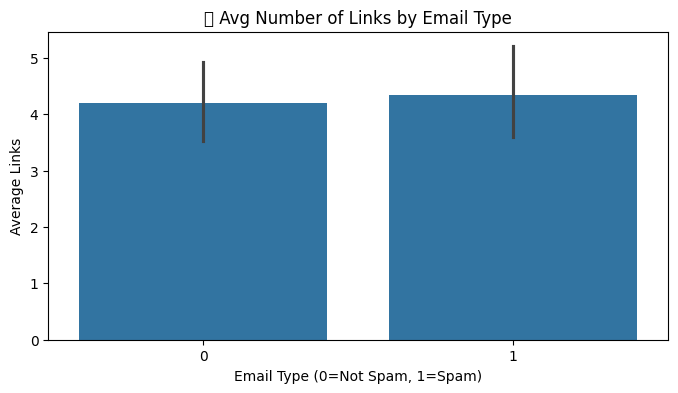

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128206 (\N{PAPERCLIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


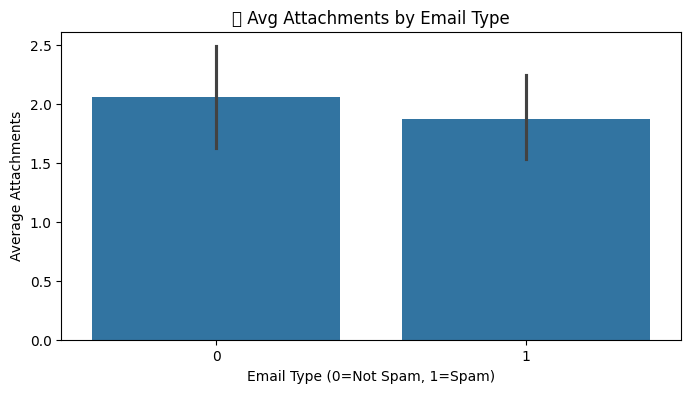

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


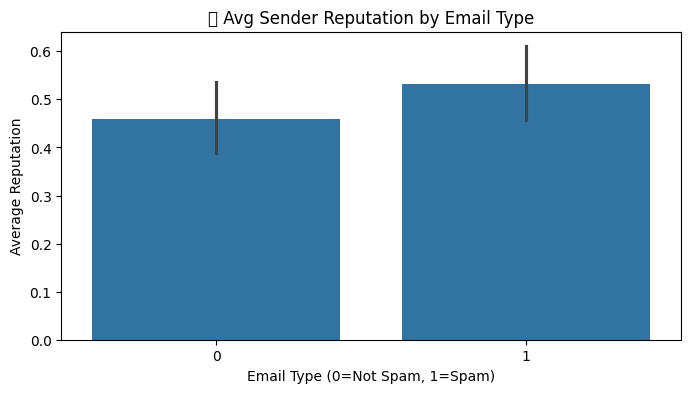

In [8]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='is_spam', y='num_links', estimator=np.mean)
plt.title('📊 Avg Number of Links by Email Type')
plt.xlabel('Email Type (0=Not Spam, 1=Spam)')
plt.ylabel('Average Links')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='is_spam', y='num_attachments', estimator=np.mean)
plt.title('📎 Avg Attachments by Email Type')
plt.xlabel('Email Type (0=Not Spam, 1=Spam)')
plt.ylabel('Average Attachments')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='is_spam', y='sender_reputation', estimator=np.mean)
plt.title('💼 Avg Sender Reputation by Email Type')
plt.xlabel('Email Type (0=Not Spam, 1=Spam)')
plt.ylabel('Average Reputation')
plt.show()

In [9]:
X = df[['num_links', 'num_attachments', 'sender_reputation']]
y = df['is_spam']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 10: Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

In [12]:
print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📃 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.5333333333333333

📃 Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.50      0.57      0.53        14

    accuracy                           0.53        30
   macro avg       0.54      0.54      0.53        30
weighted avg       0.54      0.53      0.53        30



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


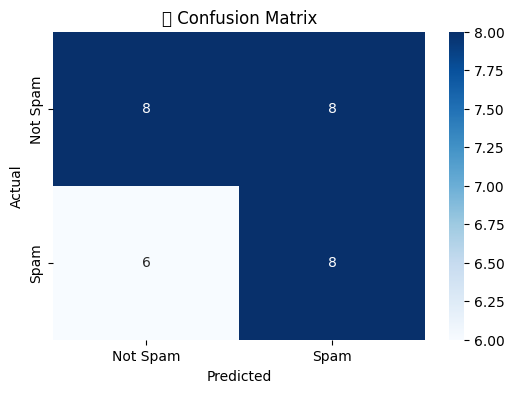

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('🔍 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
sample = [[2, 3, 0.5]]
pred = model.predict(sample)[0]
print("\n🔮 Prediction for sample [2 links, 3 attachments, 0.5 reputation]:", "Spam" if pred == 1 else "Not Spam")


🔮 Prediction for sample [2 links, 3 attachments, 0.5 reputation]: Spam


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
